In [1]:
import sys
sys.path.append('../')

from g_ml.utilidades.metricas import MSE
from g_ml.utilidades.metricas import MRE
from g_ml.algoritmos.regressao import OLS
from g_ml.algoritmos.regressao import RegressaoGD
from g_ml.algoritmos.regressao import SGD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Aplicação da Regressão linear analítica (OLS)

In [2]:
# Dados artificiais em uma dimensão
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy().reshape(-1,1)

In [3]:
ols = OLS()

In [4]:
ols.fit(X, y)

In [5]:
ols.w

array([[0.06761792],
       [1.57486517]])

In [6]:
y_pred = ols.predict(X)

In [7]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(mse))
print("O erro relativo médio absoluto é: {}".format(mre))


A raiz do erro quadrático médio é: 0.2134009013293699
O erro relativo médio absoluto é: 0.5865122801771744


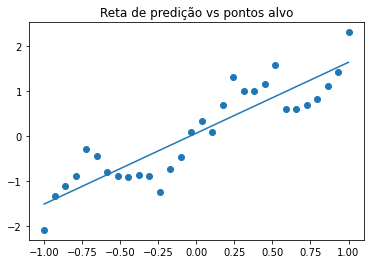

In [8]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = ols.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

Claramente precisamos de um modelo não linear

# Algoritmo Gradiente Descendente (GD)

In [9]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [10]:
gd = RegressaoGD()

In [11]:
gd.fit(X,y)

In [12]:
gd.w

array([0.06762925, 1.54599714])

In [13]:
y_pred = gd.predict(X)

In [14]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(mse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.2136978468384597
O erro relativo médio absoluto é: 0.5781328022970238


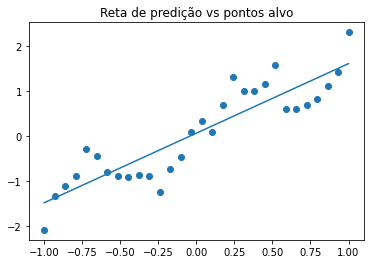

In [15]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = gd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

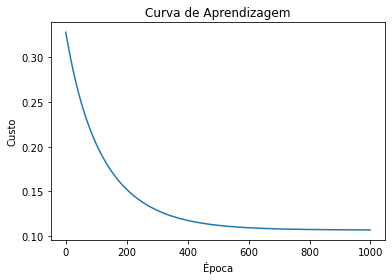

In [16]:
plt.plot(gd.custos)
plt.xlabel('Época')
plt.ylabel('Custo')
plt.title('Curva de Aprendizagem')
plt.show()

# Algoritmo Gradiente Descendente Estocástico (SGD/LMS)

In [17]:
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [18]:
sgd = SGD()
sgd.fit(X,y)
sgd.w

array([0.06897937, 1.57545885])

In [19]:
y_pred = sgd.predict(X)

In [20]:
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(mse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.21340288045422706
O erro relativo médio absoluto é: 0.586605688009825


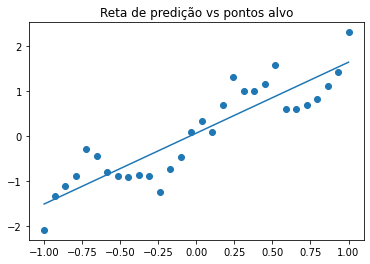

In [21]:
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = sgd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

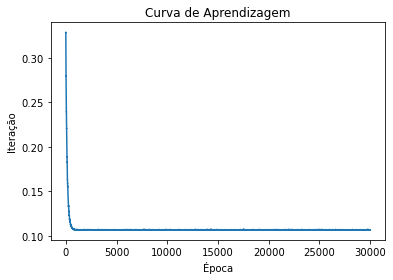

In [22]:
plt.plot(sgd.custos)
plt.xlabel('Época')
plt.ylabel('Iteração')
plt.title('Curva de Aprendizagem')
plt.show()